### Dataset Selection
This ‘Delayedflights’ Dataset originally belongs to the US Department of transportation but it is retrieved from [Kaggle](https://www.kaggle.com/giovamata/airlinedelaycauses/version/2). The data consists of over 10 million flight details from all over USA in 2008. But due to local memory constraints we will be using only 1 million records for our analysis.

## Classification Problem Definition

### Will the flight under consideration be arrival delayed or not?
    Note:-Flight is considered to be delayed if it arrives 15 minutes after scheduled arrival time or Computerized reservation system(CRS) arrival time.

###  Importing Necessary package for data explorations

In [2]:
import pandas as pd
import numpy as np
import time

##  Data Exploration

###  Loading of airlines data in a dataframe

In [3]:
# load the data file for the Flight details.
df = pd.read_csv('DelayedFlights.csv')

    Since our original data file was too big and was creating memory issues and was difficult to analyze the data. We reduced the dataset to 1 million records and wrote in the new file named "Delayed Flights New" and we will be using this file  moving further.

In [11]:
df.iloc[:100000].to_csv('Delayed Flights New.csv', index = False)

In [12]:
#Reading the new file in the dataframe
df = pd.read_csv('Delayed Flights New.csv')

In [13]:
#Analyzing records using head command
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Converting Dayofweek variable values to the dayofweek name(making dayofweek as catagorical Say 1 is Monday 2 is Tuesday so on)

In [277]:
df['DayOfWeek']= df['DayOfWeek'].replace(1,"Monday") 

In [278]:
df['DayOfWeek'] = df['DayOfWeek'].replace(2,"Tuesday") 

In [279]:
df['DayOfWeek'] = df['DayOfWeek'].replace(3,"Wednesday") 

In [280]:
df['DayOfWeek'] = df['DayOfWeek'].replace(4,"Thursday") 

In [281]:
df['DayOfWeek'] = df['DayOfWeek'].replace(5,"Friday") 

In [282]:
df['DayOfWeek'] = df['DayOfWeek'].replace(6,"Saturday") 

In [283]:
df['DayOfWeek'] = df['DayOfWeek'].replace(7,"Sunday") 

In [284]:
#Lets see how the records look like after repacements.
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,Thursday,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,Thursday,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,Thursday,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,Thursday,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,Thursday,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


    We have 5 rows and 30 columns, and We are also able to see day of week as Thursday for above records.

Let us rename Column 1 which contains unnamed:0 as the column name to Serial Number as a name.

In [285]:
df. rename(columns={'Unnamed: 0': 'Serial Number'}, inplace=True)

Let us have a quick overview of the data (columns, variable type and non-null values)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
Serial Number        100000 non-null int64
Year                 100000 non-null int64
Month                100000 non-null int64
DayofMonth           100000 non-null int64
DayOfWeek            100000 non-null object
DepTime              100000 non-null float64
CRSDepTime           100000 non-null int64
ArrTime              99690 non-null float64
CRSArrTime           100000 non-null int64
UniqueCarrier        100000 non-null object
FlightNum            100000 non-null int64
TailNum              100000 non-null object
ActualElapsedTime    99690 non-null float64
CRSElapsedTime       100000 non-null float64
AirTime              99690 non-null float64
ArrDelay             99690 non-null float64
DepDelay             100000 non-null float64
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
TaxiIn         

    As we can see above that there are few variables which have a lot of values which are null such as CarrierDelay,WeatherDelay ,NASDelay ,SecurityDelay,LateAircraftDelay.We will fill these values later.
    
    Let's start by creating delayed variable. We will be assigning values to the delayed in such a way that if the flight is delayed for more than 15 minutes after the  scheduled arrival time it will be considered as delayed and given >15 notation else <15 notation in the new column created named as delayed.
    
      The Delayed variable will contain values like <15 if flight is not delayed and >15 if the flight is delayed.
    ArrTime:-Actual arrival time of flight
    CRSArrTime:-Computerized Reservation System arrival time which is given or expected arrival time.

In [287]:
df['Delayed'] = (df['ArrTime']-df['CRSArrTime']).apply(lambda x: '>15' if x >15 else '<15')

Let us see how the delayed variable looks.

In [288]:
df[list(df.columns)[25:42]].head()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,NaN,NaN,NaN,NaN,NaN,<15
1,NaN,NaN,NaN,NaN,NaN,<15
2,NaN,NaN,NaN,NaN,NaN,>15
3,2.0,0.0,0.0,0.0,32.0,>15
4,NaN,NaN,NaN,NaN,NaN,<15


To be on a safe side if data may by any chance contain "?".We are replacing with my nan.

In [289]:
# replace ? with nan
df = df.replace('?',np.nan)

In [290]:
print('Number of samples:',len(df))

Number of samples: 100000


The most important column here is `Delayed`, which tells whether the flight was delayed or not delayed. Let us count the  count of each types.

In [291]:
# count the number of rows for each type delayed or not delayed
df.groupby('Delayed').size()

Delayed
<15    36708
>15    63292
dtype: int64

We have a column named Diverted, which tells us that the flight was diverted due to some special conditions or weather. So, it will impact the delay, so its obvious flight was not reached equivalent to cancelled

In [292]:
df.groupby('Diverted').size()

Diverted
0    99690
1      310
dtype: int64

Removing the records of the diverted flight becaue if it is diverted it will not reach the desired destination station.

In [293]:
df = df.loc[~df.Diverted.isin([1])]

Let's see the length of data frame

In [294]:
len(df)

99690

Now let's define an output variable for our binary classification. Here we will try to predict if the flight will be delayed for more than 15 minutes from scheduled arrival it means its delayed.

In [295]:
df['OUTPUT_LABEL'] = (df.Delayed== '>15').astype('int')

Now we would like to see the data for each column in our dataset. Pandas doesn't allow you to see all the columns at once, so let's look at them in groups of 10. 

In [296]:
print('Number of collumns:',len(df.columns))

Number of collumns: 32


Let's analyze first 10 columns

In [297]:
#Let's analyze first 10 columns using  
df[list(df.columns)[:10]].head()

,Serial Number,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier
0,0,2008,1,3,Thursday,2003.0,1955,2211.0,2225,WN
1,1,2008,1,3,Thursday,754.0,735,1002.0,1000,WN
2,2,2008,1,3,Thursday,628.0,620,804.0,750,WN
3,4,2008,1,3,Thursday,1829.0,1755,1959.0,1925,WN
4,5,2008,1,3,Thursday,1940.0,1915,2121.0,2110,WN


Let's analyze columns 10 to 20

In [298]:
#Let's analyze columns 10 to 20
df[list(df.columns)[10:20]].head()

,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810
1,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810
2,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515
3,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515
4,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688


Let's analyze columns 20 to 30

In [299]:
#Let's analyze columns 20 to 30
df[list(df.columns)[20:30]].head()

,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Now its the turn for columns 31 and 32.

In [300]:
#Now its the turn for columns 31 and 32.
df[list(df.columns)[30:40]].head()

,Delayed,OUTPUT_LABEL
0,<15,0
1,<15,0
2,>15,1
3,>15,1
4,<15,0


Getting the list of Unique values for every data column. If the number of unique values are less than 30 then we need to print values otherwise we will be printing unique values

In [301]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Serial Number: 99690 unique values
Year
[2008]
Month
[1]
DayofMonth: 31 unique values
DayOfWeek
['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
DepTime: 1274 unique values
CRSDepTime: 1038 unique values
ArrTime: 1410 unique values
CRSArrTime: 1226 unique values
UniqueCarrier
['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL']
FlightNum: 5685 unique values
TailNum: 2473 unique values
ActualElapsedTime: 473 unique values
CRSElapsedTime: 406 unique values
AirTime: 451 unique values
ArrDelay: 519 unique values
DepDelay: 443 unique values
Origin: 216 unique values
Dest: 217 unique values
Distance: 1006 unique values
TaxiIn: 97 unique values
TaxiOut: 191 unique values
Cancelled
[0]
CancellationCode
['N']
Diverted
[0]
CarrierDelay: 384 unique values
WeatherDelay: 302 unique values
NASDelay: 363 unique values
SecurityDelay: 66 unique values
LateAircraftDelay: 368 unique values
Delayed
['<15' '>15']
OUTPUT_LABEL
[0 1]


From this, we can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out, 

    - Serial number is the identifier and does not have useful value so can be removed.
    - Cancelled, Cancellation code, Month and Year just have one value, so we should not use variables.
    - Diverted flights have already been removed from the dataset.
    - Tail number can also be removed as this is the flight registration number.
    - Delayed variable can also be removed as the output variable contains delayed or not binary values
    - Arrival time variable is also removed as it creates a correlation with the output variable.
        Reference: df['Delayed'] = (df['ArrTime']-df['CRSArrTime']).apply(lambda x: '>15' if x >15 else '<15')
    - Since the algorithm was able to learn for figuring out the Delays. So, we removed the columns  ArrTime, ArrDelay, AirTime, and  ActualElapsedTime from the final columns.

# Feature Engineering

In this section, we will create the features of our flight delays predictive model. We will also add new variables to data frame using categorical features and will keep track of all the columns of the data frame.

## Numerical Features

The easiest type of features which do not require any modifications and the values that contain are numerical values are numerical features.
#### Storing of numerical features

In [302]:
cols_num = ['DayofMonth','DepTime','CRSDepTime','CRSArrTime','FlightNum','CRSElapsedTime',
            'DepDelay','Distance','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay',
            'SecurityDelay','LateAircraftDelay']

Let's check if there are any missing values in the numerical data. If there are we will fill with default or 0. For example if the carrier Delay is not given, we will assume that there is no delay and mark it as 0. Likewise, we will mark 0 for all the other delays. 

In [303]:
df[cols_num].isnull().sum()

DayofMonth               0
DepTime                  0
CRSDepTime               0
CRSArrTime               0
FlightNum                0
CRSElapsedTime           0
DepDelay                 0
Distance                 0
TaxiIn                   0
TaxiOut                  0
CarrierDelay         34588
WeatherDelay         34588
NASDelay             34588
SecurityDelay        34588
LateAircraftDelay    34588
dtype: int64

Let's add 0 where the delay is not known as if there is a delay it is mentioned otherwise 0. 

In [304]:
df['CarrierDelay'] = df.CarrierDelay.fillna('0')

In [305]:
df['WeatherDelay'] = df.WeatherDelay.fillna('0')

In [306]:
df['NASDelay'] = df.NASDelay.fillna('0')

In [307]:
df['SecurityDelay'] = df.SecurityDelay.fillna('0')

In [308]:
df['LateAircraftDelay'] = df.LateAircraftDelay.fillna('0')

Let's see if all  numerical values are filled

In [309]:
df[cols_num].head()

,DayofMonth,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3,2003.0,1955,2225,335,150.0,8.0,810,4.0,8.0,0,0,0,0,0
1,3,754.0,735,1000,3231,145.0,19.0,810,5.0,10.0,0,0,0,0,0
2,3,628.0,620,750,448,90.0,8.0,515,3.0,17.0,0,0,0,0,0
3,3,1829.0,1755,1925,3920,90.0,34.0,515,3.0,10.0,2,0,0,0,32
4,3,1940.0,1915,2110,378,115.0,25.0,688,4.0,10.0,0,0,0,0,0


Let's cross-check if there are any other missing values in the numerical data

In [310]:
df[cols_num].isnull().sum()

DayofMonth           0
DepTime              0
CRSDepTime           0
CRSArrTime           0
FlightNum            0
CRSElapsedTime       0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Lets see how our numercal variable look like.

In [311]:
df[cols_num].head()

,DayofMonth,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3,2003.0,1955,2225,335,150.0,8.0,810,4.0,8.0,0,0,0,0,0
1,3,754.0,735,1000,3231,145.0,19.0,810,5.0,10.0,0,0,0,0,0
2,3,628.0,620,750,448,90.0,8.0,515,3.0,17.0,0,0,0,0,0
3,3,1829.0,1755,1925,3920,90.0,34.0,515,3.0,10.0,2,0,0,0,32
4,3,1940.0,1915,2110,378,115.0,25.0,688,4.0,10.0,0,0,0,0,0


## Categorical Features

The next type of features we want to create are categorical variables.

Categorical variables are non-numeric data such as Flight origination, destination, Day of Week and Carrier such as "American Airlines". To turn these non-numerical data into numerical variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

The first set of categorical data we will deal with are these columns:

In [312]:
#Storing of Categorical variables
cols_cat =['UniqueCarrier','Origin','Dest','DayOfWeek']

Let's check if there are any missing data

In [313]:
#Checking of missing data
df[cols_cat].isnull().sum()

UniqueCarrier    0
Origin           0
Dest             0
DayOfWeek        0
dtype: int64

Lets check our Catagorical Variables

In [314]:
df[cols_cat].head()

,UniqueCarrier,Origin,Dest,DayOfWeek
0,WN,IAD,TPA,Thursday
1,WN,IAD,TPA,Thursday
2,WN,IND,BWI,Thursday
3,WN,IND,BWI,Thursday
4,WN,IND,JAX,Thursday


### One-Hot Encoding Scheme

Definition and Description of panda get dummies Function

    In one-hot encoding technique, we create unique columns for each of the distinct categorical values for that column. For example, for the column Day of week, we would create new columns as 'DayOfWeek_Monday, 'DayOfWeek_Tuesday’ etc. If  the Day of Week is Monday, the day of week gets 1 under ‘DayOfWeek_Monday’ and 0 under rest of the Day of Week Tuesday, so on.
    To create one-hot encoding for a column, we will use the pd.get_dummies function. Prefix is used in the syntax so that the dataset can be reverted to original state with all the basic columns if required.
    
    pd.get_dummies function in Python which converts categorical variables into dummy or indicator variables. Let us create new columns for the variable "Unique Career".


In [315]:
pd.get_dummies(df['UniqueCarrier'],prefix = 'UniqueCarrier').head()

,UniqueCarrier_DL,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


Now the problem is that if we create a column for each unique value, we have correlated columns. In other words, the value in one column can be figured out by looking at the rest of the columns. For example, if the sample is not having DayofWeek as Monday,Tuesday,Wednesday,Thursday.Friday and Saturday.So,It must be Sunday. So we can drop first column to reduce the number of rows and correlated items by making drop first as True.

In [316]:
pd.get_dummies(df['UniqueCarrier'],prefix = 'UniqueCarrier', drop_first = True).head()

,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


It becomes a troublesome work if we want to have get_dummies for each of the categorical columns. We have an option to send all columns at once into get_dummies and the column name as a prefix.

In [317]:
pd.get_dummies(df[cols_cat],drop_first = True).head()

,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABQ,Origin_ACV,Origin_AEX,...,Dest_VPS,Dest_XNA,Dest_YKM,Dest_YUM,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we are ready to make all of our categorical features and store it in df_cat.

In [318]:
df_cat = pd.get_dummies(df[cols_cat], drop_first = True)

In [319]:
df_cat.head()

,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABQ,Origin_ACV,Origin_AEX,...,Dest_VPS,Dest_XNA,Dest_YKM,Dest_YUM,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we will concatenate our categorical data  with original axis  is 1 represents horizontal concatenation

In [320]:
df = pd.concat([df,df_cat], axis = 1)

We will Store the list of all columns categorical variables contained in df_cat to Cols_all_Cat

In [321]:
cols_all_cat = list(df_cat.columns)

Lets analyze how our categorical variables look like.

In [322]:
df[cols_all_cat].head()

,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABQ,Origin_ACV,Origin_AEX,...,Dest_VPS,Dest_XNA,Dest_YKM,Dest_YUM,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Engineering Features Summary

Let us get the summary of features for numerical and categorical variables

In [323]:
print('Total number of features:', len(cols_num)+len(cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 459
Numerical Features: 15
Categorical Features: 444


Let's have a new data frame which has columns of interest Numerical variables.

In [324]:
df[cols_num].head()

,DayofMonth,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3,2003.0,1955,2225,335,150.0,8.0,810,4.0,8.0,0,0,0,0,0
1,3,754.0,735,1000,3231,145.0,19.0,810,5.0,10.0,0,0,0,0,0
2,3,628.0,620,750,448,90.0,8.0,515,3.0,17.0,0,0,0,0,0
3,3,1829.0,1755,1925,3920,90.0,34.0,515,3.0,10.0,2,0,0,0,32
4,3,1940.0,1915,2110,378,115.0,25.0,688,4.0,10.0,0,0,0,0,0


Lets check if all the categorical values are not null

In [325]:
df[cols_cat].isnull().sum()

UniqueCarrier    0
Origin           0
Dest             0
DayOfWeek        0
dtype: int64

In [326]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [327]:
df_data.head()

,DayofMonth,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,...,Dest_XNA,Dest_YKM,Dest_YUM,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,OUTPUT_LABEL
0,3,2003.0,1955,2225,335,150.0,8.0,810,4.0,8.0,...,0,0,0,0,0,0,1,0,0,0
1,3,754.0,735,1000,3231,145.0,19.0,810,5.0,10.0,...,0,0,0,0,0,0,1,0,0,0
2,3,628.0,620,750,448,90.0,8.0,515,3.0,17.0,...,0,0,0,0,0,0,1,0,0,1
3,3,1829.0,1755,1925,3920,90.0,34.0,515,3.0,10.0,...,0,0,0,0,0,0,1,0,0,1
4,3,1940.0,1915,2110,378,115.0,25.0,688,4.0,10.0,...,0,0,0,0,0,0,1,0,0,0


## Building Training/Validation/Test Samples

So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

    -Training Samples: In supervised learning, these are the samples which contains the output
         variables or the outcomes to train the machine learning model.
    -Validation Samples: These samples are used to make decisions on how to find and optimize the best
          suited model for a given problem and the intention is to improve the model.
    -Test Samples: These are used to measure the performance of the model on unseen data.

  
We will be using samples as 70% training data,15% validation and rest as test data

In [328]:
def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        print('column:',c)
        print('1:', df_mean_in.loc[df_mean_in.col == c,'mean_val'])
        print('2:', df_mean_in.loc[df_mean_in.col == c,'mean_val'].values)
        print('3:',df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0])
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df


We are shuffling the samples with the random state 42(It is same as seed function in R which is used to produce same random results) to reduce bias. This is done so that to avoid the samples of same type getting accumulated. For example, training data containing all positive cases. To reduce this, we use sample function below.

Here we are extracting 30 per cent of data in  a data frame containing both validation and test data using sample function.

In [330]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


Now we will split the data frame containing validation and test data and store it into the respective data frames. We are splitting in such a way that half of the records go to the training dataset and rest to the test. Note at last both the dataset will contain 15 percent of the total observations.

In [331]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

 `.drop`  drops the rows of the set. We will get the records in the training dataset from the entire dataset excluding those records which are in the validation and test set.

In [332]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

At this point, let's check what percent of Flights are delayed more than 15 minutes. This is known as prevalence.  

In [333]:
#This is defined for calculating Prevalance.
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [334]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 14954):0.642
Valid prevalence(n = 14953):0.636
Train all prevalence(n = 69783):0.633


The prevalence is about the same for each group. 

Great, it means we have more flight delays than not delays. Seems that flight delays are very common. More than 63% of the flights were delayed in validation and training datasets.

Let's verify that we used all the data.

In [335]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 99690)


Let’s save all our work of Splitting in separate files in our folder. Here, index =false just drops index values from the csv.

In [336]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

# Data Preparation

    Importing matplot library package
     matplotlib is a plotting library for the Python programming language and its numerical mathematics extension of NumPy

In [337]:
import matplotlib.pyplot as plt

We will load training and validation dataset. 
    
      Note:-Tests set will not be loaded until models are tuned.

In [338]:
#Reading training,validation and test data
df_train_all = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')

In [339]:
#Printing of Training and Validation Prevalences.
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Valid prevalence(n = 14953):0.636
Train all prevalence(n = 69783):0.633


Now we will split the training data  and make it balanced

    The goal of below is to split the training data to positive and negative and then make the training data balanced as an equal number of flight delays and non-delays. In our dataset we were having more delays than non-delays, we have    made it to an equal proportion. So, finally, we have 50% flight delays and 50% non-delays as depicted by prevalence for the training dataset.

In [340]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data(In our dataset we have more positives then negatives So we have concatenated with 
#respect to negative test cases 
df_train = pd.concat([df_train_neg, df_train_pos.sample(n = len(df_train_neg), random_state = 42)],axis = 0)

# shuffle the order of training samples we have a random state of 42 however we can also change the state value
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

col2use = [c for c in list(df_train_all.columns) if c != 'OUTPUT_LABEL']
print('Number of columns to use:', len(col2use))

Train balanced prevalence(n = 51222):0.500
Number of columns to use: 459


Now we will find mean for all the columns and will store in df_mean.csv. After storing we will read all the means and then will print to see the output. The main purpose of doing this is some of our machine learning algorithms such as logistic regression does not support null or missing values. So, we will be adding the mean values in missing values.

In [341]:
#writing training data to CSV
df_train.to_csv('df_train.csv',index=False)

In [342]:
df_mean = df_train[col2use].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [343]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,DayofMonth,15.329351
1,DepTime,1504.967416
2,CRSDepTime,1462.270314
3,CRSArrTime,1626.374976
4,FlightNum,2388.714732


We have defined the function which will fill the missing values for all the columns. This function will be used for training and validation datasets as depicted below.

In [344]:
def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [345]:
df_train_all = fill_my_missing(df_train_all, df_mean_in)
df_train = fill_my_missing(df_train, df_mean_in)
df_valid = fill_my_missing(df_valid, df_mean_in)

Most machine learning packages like to use an input matrix X and output vector y, so let's create those:

In [346]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (69783, 459)
Training shapes: (51222, 459) (51222,)
Validation shapes: (14953, 459) (14953,)


As we can see we have the variables of different sizes. But most of our machine learning algorithms have the trouble when there are different sized variables. To resolve this, we usually scale data. We can use a standard or balanced scaler, but we are using a standard scaler. This removes the mean and scales it to variance. We will use the scaler using training data. This process is also called  data normalization.


In [347]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

Again, we will need this scaler for the test data, so let's save it using a package called `pickle`. 

In [348]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

Load it back:

In [349]:
scaler = pickle.load(open(scalerfile, 'rb'))

Most of the machine learning algorithms use the transformed matrices. Let’s transform the matrices.

In [350]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection

## Tour of machine learning algorithms in sklearn

We will now explore a few different machine learning algorithms.Lets use the default parameters.

In [351]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

We have defined Specificity function which returns the specificity values based in threshold which we have taken as 0.5 and input parameters. Report function will calculate AUC, accuracy, recall, precision, specificity, prevalence.

For this analysis, let's set our threshold at 0.5.

In [352]:
thresh = 0.5

# KNN

       In KNN for a given sample set we always look for the K(hyperparameter) nearest datapoints and the probability is calculated by number of true positive flight delay predictions/( number of samples). We have some great advantages of KNN which is easy to implement, have no assumptions about any structure of data. It also has a disadvantage that it takes a lot of time to run for this model it took around 2 hours to produce results. Moreover , model also depends upon K if K is large it predicts majority of cases and learns the training set.

In [353]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [354]:
import time
t1 = time.time()
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]
t2 = time.time()
print("Time Taken:")
print(t2-t1)
print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


Time Taken:
2521.1584055423737
KNN
Training:
AUC:0.694
accuracy:0.637
recall:0.534
precision:0.672
specificity:0.707
prevalence:0.500
 
Validation:
AUC:0.676
accuracy:0.599
recall:0.522
precision:0.773
specificity:0.696
prevalence:0.636
 


     AUC (TP/(TP+FN) vs FP/(FP+TN))
      Looking at the AUC values with the threshold 0.5. AUC comes from ROC which the number of mistakes we made in predicting true flight delays. We can see that we have got 69.4 percent of delays prediction got correct in the training dataset while 67.6 percent got correct in the validation dataset.
      
    For this classification type of problem this is very low value for AUC. The AUC for ROC curve should be as close as   possible to 1.
    
    If AUC is 1 model is Excellent
    If AUC is 0.8 model is very good
    In our case AUC is .72 so over model is  above average.

    Accuracy (TP+TN)/(TP+TN+FP+FN)
      Accuracy refers to the total number of correct predictions out of total predictions. Fraction of predictions our    model got right. We can see that in the training dataset 63.7% of predictions for fight delayed got correct in training dataset and 59.9 percent in validation dataset. These values are low   
      
    Precision (TP/TP+FP)
     Precision refers to what proportion of positive flight delays were correctly identified by the model. Precision in training is 67.2 percent which means model was able to identify only 67.2 percent of flight delayed that happened correctly  in training and 77.3 percent in validation 
     
     Recall(sensitivity = (TP / (TP + FN))
    Recall answers that what proportion of total positive flight delays were identified correct. It means our model was able to predict 53.4  percent in training and 52.2 percent in validation which are very low values.

      Specificity(TN / (TN + FP)
    Specificity refers to all those non-delays which were identified correctly. Our model was able to identify 70.7 percent of non-delays in Training set correctly while 69.6 percent in validation set and this is again low.
    
     From all the set of values identified this model is not suitable for further consideration of model selection.


## Logistic regression

    This is the standard logistic regression model.
    This is a type model which can be understood very easily and possess a linear decision boundary. Features can be interpretable .There are also set of rules associated with it which needs to follow. Such as data must be normalized, cannot handle missing values. need matrix as well as its transformations which causes run time to increase.

In [355]:
# logistic regression
#Sklearn provides numerous functions for Logitic regression.We just need to import Logistic Regression package
#We will use the ramdom state same as previous and fit our X trasformed training metrics with y training.
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [356]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.893
accuracy:0.852
recall:0.806
precision:0.888
specificity:0.898
prevalence:0.500
 
Validation:
AUC:0.887
accuracy:0.835
recall:0.805
precision:0.925
specificity:0.886
prevalence:0.636
 


    Observation
    AUC: If we see the AUC values for both the training and validation dataset are 89.3% and 88.7% respectively. Which means we are close to 89% correct in predicting flight delays using this model.  These AUC values are somewhat better as compared to KNN model.
    
    Accuracy: We have the accuracy of 85.2 in training dataset and 83.5 in validation dataset. Which means our model is close to 85%  accurate in correctly predicting the flights which will be delayed, and which will not.
    
    Recall: Our model has identified 80.6 per cent of positive flight delays correctly in the training dataset and 80.5  per cent in validation datasets of positive flight delays were identified correctly.
    
    Precision: Our model was able to identify only 88.8 per cent of flight delays that happened correctly  in training and 92.5 per cent in validation.
    
    Specificity: what proportion of total non-delays were identified correctly? The answer is our model was able to predict 89.8  per cent in training and 88.6 per cent in validation which is good.


## Stochastic Gradient Descent

    This algorithm is used when we have a lot of data for processing and the logistic regression takes a lot of time to compute this algorithm is useful as it works similar to logistic regression but it does not take entire data at each iteration.

In [357]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\bikra\Anaconda3\envs\pa_2018\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [358]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.856
accuracy:0.776
recall:0.678
precision:0.843
specificity:0.873
prevalence:0.500
 
Validation:
AUC:0.849
accuracy:0.743
recall:0.675
precision:0.895
specificity:0.861
prevalence:0.636
 


    Observation
    AUC: If we see the AUC values for both the training and validation dataset they are both close to 85% which means we are far from achieving correct delays prediction. We can take this AUC to 100% during our performance optimization.
    
    Accuracy:  We are 77.6 per cent accurate in correctly predicting the flights which will be delayed, and which will not for training dataset and 74.3  per cent for validation dataset.
    
    Recall: Our model  has identified 67.8 per cent of positive flight delays correctly in the training dataset and 67.5 per cent in validation ( positive flight delays was identified correctly).
    
    Precision: Our model was able to identify only 84.3 per cent of flight delayed that happened correctly in training and 89.5 per cent in validation.
    
    Specificity: what proportion of total non-delays were identified correctly? The answer is our model was able to predict 87.3  per cent in training and 86.1  per cent in validation.


# Naive Bayes

    This algorithm works well with natural language processing and main advantage of this is that it considers that all features are independent of each other.

In [359]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None)

In [360]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.643
accuracy:0.545
recall:0.158
precision:0.699
specificity:0.932
prevalence:0.500
 
Validation:
AUC:0.628
accuracy:0.437
recall:0.158
precision:0.785
specificity:0.924
prevalence:0.636
 


     Observation
    AUC : As we can see that this model was able to predict 64.3% of the flight delays correctly when compared to the predictions made wrong for the training dataset. However, for validation dataset, we have 62.8% of AUC value. This is not a good value and this model will not suit our classification problem.
    
    Accuracy: This model has predicted 54.5% of the flight delays correctly in training set and 43.7% in the validation set.
   
    Recall:  We have only 15.8% of the flight delays were identified correctly out of the total number of flight delays predicted by the model in training dataset and 15.8% in the validation dataset.
    
    Precision: Our model has predicted 69.9% of flight delays out of total flight delays in training dataset and 78.5% in the validation dataset
    
    Specificity: Our model has predicted 93.2 % of the non-delays out of all non-delays in training set and 92.4% in the validation set.
    
    This model is not suitable for further consideration as we have low values for AUC, Accuracy and recall.


## Decision Tree Classifier

    This type of model is actually complex but really simple to understand.Moreover there are no assumptions regarding the structure of data.The main problem with this type of model is that it can memorize training data and overfits easily


In [361]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [362]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.982
accuracy:0.965
recall:0.951
precision:0.979
specificity:0.980
prevalence:0.500
 
Validation:
AUC:0.971
accuracy:0.955
recall:0.947
precision:0.982
specificity:0.969
prevalence:0.636
 


    Observation
    AUC: We have an AUC value of 98.2% in training dataset and 97.1% in the validation dataset. It means our model can very well predict flight delays correctly with less wrong predictions.
    
    Accuracy: We have a very good accuracy of 96.5% in training dataset and 95.5% in validation dataset which means our model is very good at predicting delays.
    
    Recall: We have 95.1% of flight delays which were identified correctly out of all delays in training dataset and 94.7% in the validation dataset 
    
       Precision and Specificity, we have close to 98% precision and specificity for training datasets which means all flight delays were correctly identified and all non-delays were also correct to a maximum extent with a very little improvement required. For the validation also, we have close to 97.5% of these values. This model is suitable for further consideration.


## Random Forest

    Random forest is an extension of decision trees and it is the bunch of corelated trees.It works better than decision trees in most of cases.

In [363]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [364]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.949
accuracy:0.898
recall:0.882
precision:0.911
specificity:0.914
prevalence:0.500
 
Validation:
AUC:0.945
accuracy:0.894
recall:0.886
precision:0.944
specificity:0.907
prevalence:0.636
 


    Observation
    
    AUC Comparison in Random forest we have an AUC of 94.9% in training dataset and 94.5% in the validation dataset. It means that our model can very well predict true flight delays over false flight delays prediction. It will make very fewer mistakes in predicting flight delays.
    
    Accuracy Comparison Our model is 89.8% accurate for the training set and 89.4% accurate for validation set.so the correctness in predictions is acceptable.
    
    Recall Comparison Recall values are 88.2% for training dataset an 88.6% for validation dataset which is acceptable.
    
    Precision and Specificity Both precision and Specificity values are above 90%. Hence this model is acceptable for further consideration.
    
    This model can also be chosen for future consideration.

## Gradient Boosting Classifier

     This is a very effective model. In this model Learning rate determines how fast the classifier tries to fix errors. Higher means more fitting and lower means it needs more trees.

In [365]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [366]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.979
accuracy:0.959
recall:0.957
precision:0.961
specificity:0.961
prevalence:0.500
 
Validation:
AUC:0.979
accuracy:0.955
recall:0.954
precision:0.975
specificity:0.957
prevalence:0.636
 


    AUC  and Accuracy Comparison
    This model has a very good AUC for training dataset which is 97.9% and 97.9% for the validation dataset. Accuracy means several correct predictions for the flight delays which is very good for the training set i.e. 95.9% and for validation it is 95.5%.
    
    Recall, Precision and Specificity
    All the values for recall, precision and specificity are above 95% and hence it suits our needs. This model can be taken to next level for prediction.


# Analyze results

Let's make a dataframe with these results and plot the outcomes using a package called seaborn. 

In [367]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

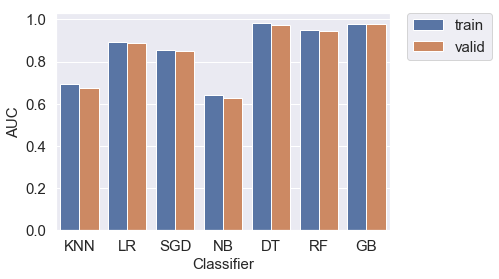

In [369]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

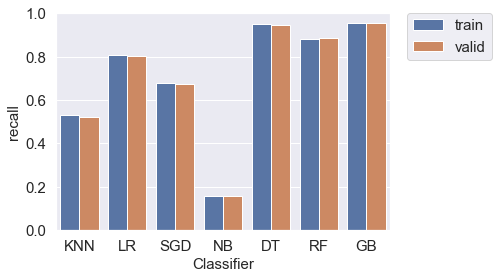

In [370]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

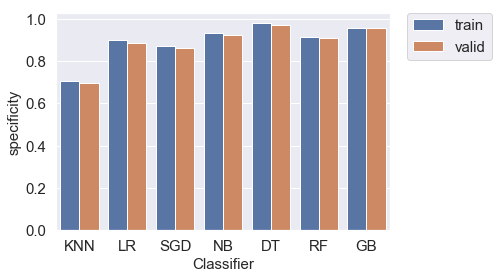

In [371]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

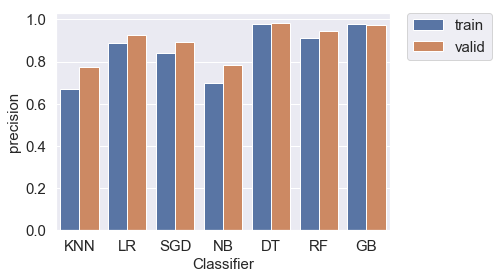

In [372]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

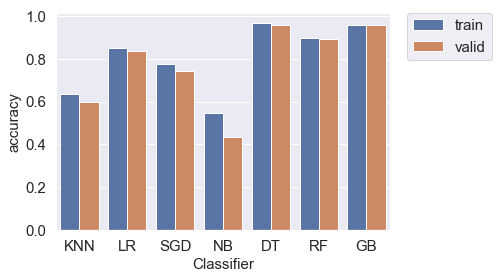

In [373]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

# Learning Curve

Let us start drawing the learning curve
Reference. http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html. 

In [374]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [375]:
from sklearn.ensemble import RandomForestClassifier

A Random Forest with max_depth = 3, resulting in a bias 

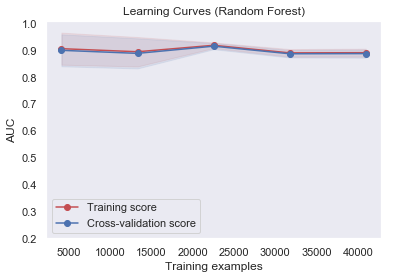

In [376]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 3, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

A Complex Random Forest with max_depth = 50, resulting in less bias and high AUC

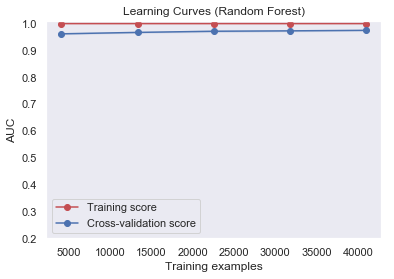

In [377]:

title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 50, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

In the first case, we see that there is somewhat bias but in the second case is a best case where there is very low bias and low variance.

Let's discuss some of the hyperparameters and their tuning with respect to the strategy of Hyperparameter tuning.

# Feature Importance

    Another strategy for model improvement is to understand what the important features of a model are and what are not, this is possible using models like logistic Regression and random forests. If we add new features it will help us with the treatment of high bias and high variance. We will obtain the top list of features for treating variance.

## logistic regression

    Logistic regression is a very interpretable model because the coefficient for each variable shows how important that variable is for the prediction. Note that you need to have normalized the data so the coefficients are comparable between variables. 

In [378]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can extract the coefficients using `coef_` and store in a new dataframe (sorted by importance) 

In [379]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [380]:
feature_importances.head()

,importance
LateAircraftDelay,4.178475
CarrierDelay,4.035501
NASDelay,3.196376
WeatherDelay,1.808374
DepTime,1.082028


For logistic regression, the variables with highest positive coefficients are predictive of Flight arrival delays while the variables of negative represent non-delays.

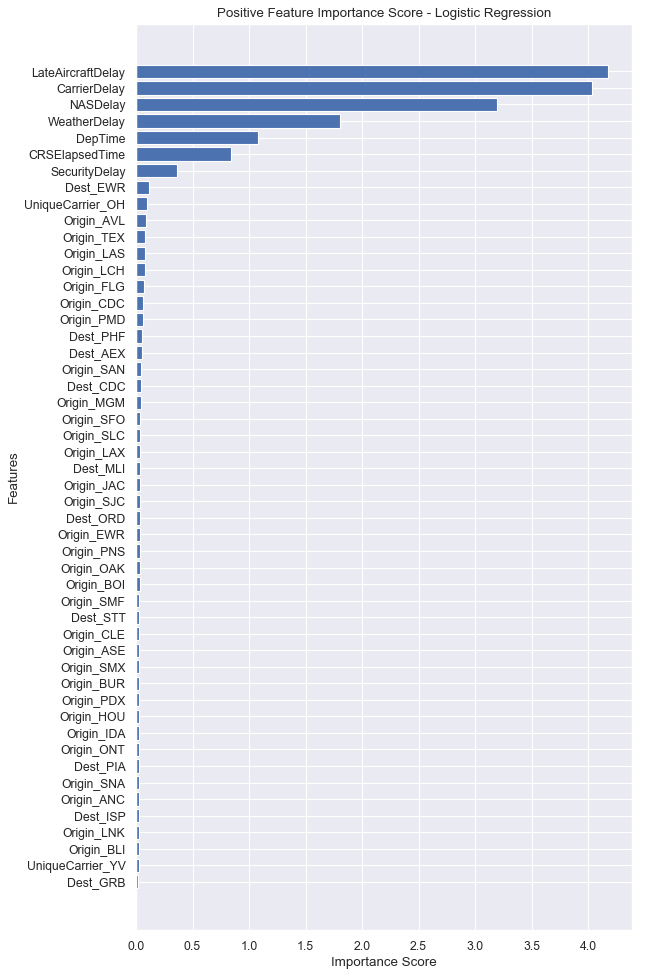

In [381]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

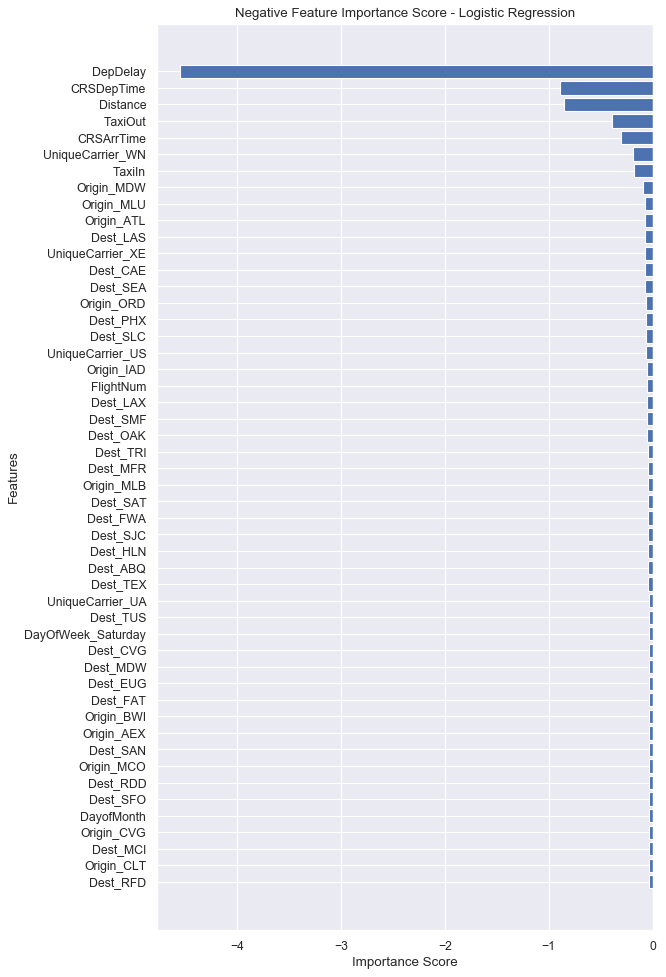

In [382]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

## Random forest

    There is another way of highlighting feature importance in which the feature importance depicts how often particular feature was used to split the data. This makes a feature importance in decision making. 

In [383]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [384]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [385]:
feature_importances.head()

,importance
LateAircraftDelay,0.266327
NASDelay,0.190525
CarrierDelay,0.183505
DepDelay,0.110751
TaxiOut,0.048517


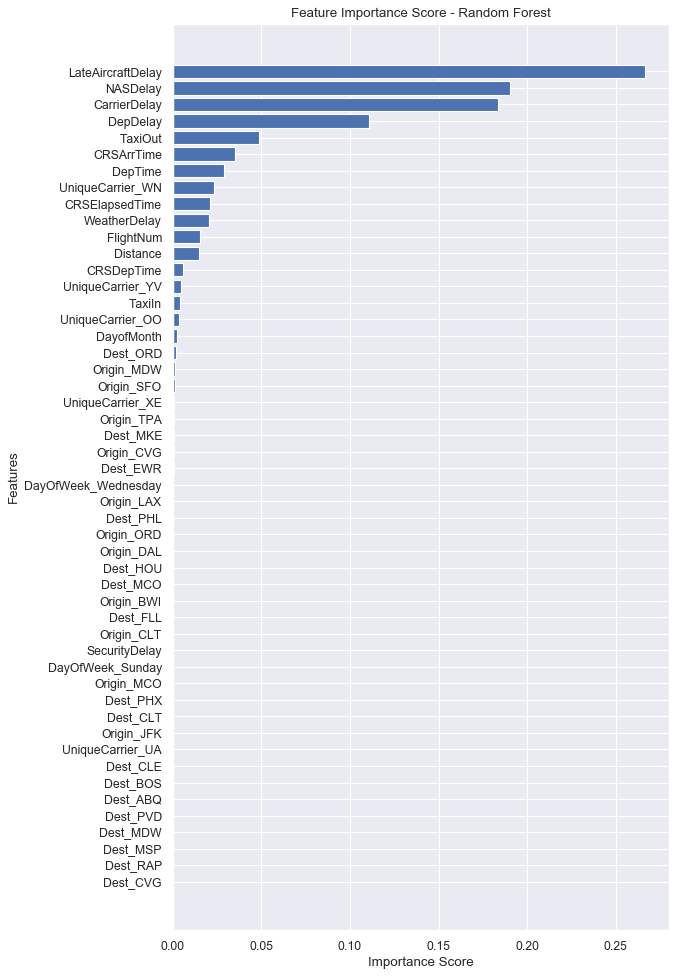

In [386]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

After looking at all the plots. We see that all kinds of delays are responsible for  the Flight delays. Moreover, Flight departure times also matter. This means that if there are various types of delays associated with the flights .It is highly likely that the flight will be delayed.

# Hyperparameter tuning

Hyperparameters are the controlling knobs whose values are never estimated from data and it is external to model. In a machine learning algorithm which are tuned to a particular problem then we tune the hyperparameters to discover the parameters which have the impact on decision making.

Let's begin by looking at the effect of a single parameter for random forest: `max_depth`. `max_depth` controls the depth of the tree. 

In [387]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

Plot the results

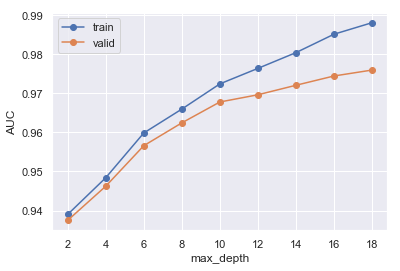

In [388]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

We can see that as we increase the `max_depth` the training performance is improved also validation performance also improoves to some extent.

Since there are many hyperparameters for each model, there exist a few techniques to optimize the parameters automatically for you. 

#  Random Search (Optimization of Parameters Automatically)

    With the help of ‘get_params’, We can get the list of parameters inside the model. Let’s analyze the parameters in the random forest model.

In [389]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Let's create the grid of some of the parameters.

In [390]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. Here we will use the auc. 

In [391]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [392]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20,
                               cv = 2, scoring=auc_scoring,verbose = 1, random_state = 42)

Three important parameters of `RandomizedSearchCV` are
- scoring = evaluation metric used to pick the best model
- n_iter = number of different combinations
- cv = number of cross-validation splits

increasing the last two of these will increase the run-time, but will decrease chance of overfitting.  Note that the number of variables and grid size also influences the runtime. Cross-validation is a technique for splitting the data multiple times to get a better estimate of the performance metric. For the purposes of this tutorial, we will restrict to 2 CV to reduce the time. 

In [393]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 21.4min finished


1374.606092453003


See the best parameters

In [394]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'gini'}

Let's analyze the performance of the best model compared to the baseline model.

In [395]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
print('Training AUC:%.3f'%(roc_auc_score(y_train, y_train_preds)))
print('Validation AUC:%.3f'%(roc_auc_score(y_valid, y_valid_preds)))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.949
Validation AUC:0.945
Optimized Random Forest
Training AUC:0.989
Validation AUC:0.977


`Note that in this case, we do get great boost on the Training and Validation AUC.

# Optimized SGDClassifier

In [396]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\bikra\Anaconda3\envs\pa_2018\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [397]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc,
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

993.4679996967316


In [398]:
sgdc_random.best_params_

{'penalty': 'l1', 'max_iter': 400, 'alpha': 0.001}

In [399]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
print('Training AUC:%.3f'%(roc_auc_score(y_train, y_train_preds)))
print('Validation AUC:%.3f'%(roc_auc_score(y_valid, y_valid_preds)))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.856
Validation AUC:0.849
Optimized sgdc
Training AUC:0.896
Validation AUC:0.891


Note that in this case, we do get great boost on the Training and Validation AUC.

In [400]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

# Analyze Results

Let's prepare a data frame with the results and then we will plot the outcomes.

In [401]:
#gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
#gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF'],
                           'data_set':['train','valid']*2,
                          'auc':[sgdc_train_auc,sgdc_valid_auc,rf_train_auc,rf_valid_auc,],
                          })

In [402]:
df_results

,classifier,data_set,auc
0,SGD,train,0.896009
1,SGD,valid,0.891039
2,RF,train,0.988883
3,RF,valid,0.976694


In [403]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

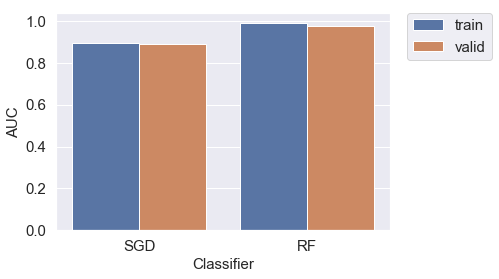

In [404]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Save your best classifier

It is not possible to train our best classifier every time for use when we want to run new predictions. So, we have the provision to save our best classifier. There is a package called pickle. We will save  random forest algorithm as a best one because it has the closest training and validation scores and performs well then other algorithms.

In [405]:
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation(Random Forest)

    Random forest is an estimator that first sub-samples the dataset and then fits the number of decision trees. The goal is to improve the accuracy and make low variance and low bias. It works better then the decision trees in most of cases!

Our final model has been selected as a random forest and now its the time to evaluate our model with the unseen test data which is untouched till now and lets understand how our model performs.

Loading the best model using pickle package.

In [406]:
import pickle
# load the model
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [407]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

# Prepare the data

In [408]:
#Reading  test data
df_test= pd.read_csv('df_test.csv')

In [409]:
col2use = [c for c in list(df_train.columns) if c != 'OUTPUT_LABEL']
print('Number of columns to use:', len(col2use))

Number of columns to use: 459


In [410]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])

# fill missing
df_train = fill_my_missing(df_train, df_mean_in)
df_valid = fill_my_missing(df_valid, df_mean_in)
df_test = fill_my_missing(df_test, df_mean_in)

# create X and y matrices
X_train = df_train[col2use].values
X_valid = df_valid[col2use].values
X_test = df_test[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# load the scaler
scaler = pickle.load(open('scaler.sav', 'rb'))

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

# Predictions

In [411]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

# Evaluate the performance

In [412]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.989
accuracy:0.962
recall:0.957
precision:0.967
specificity:0.967
prevalence:0.500
 
Validation:
AUC:0.977
accuracy:0.948
recall:0.954
precision:0.964
specificity:0.937
prevalence:0.636
 
Test:
AUC:0.976
accuracy:0.950
recall:0.951
precision:0.970
specificity:0.948
prevalence:0.642
 


               AUC    Accuracy  Recall   Precision   Specificity    Prevalence
    Training    98.9   96.2       95.7     96.7         96.7         50
    Validation  97.7   94.8       95.4     96.4         93.7         63.6
    Test        97.6   95.0       95.1     97.0         94.8         64.2
     
    AUC Comparison (TP/(TP+FN) vs FP/(FP+TN))
    Looking at the AUC values, AUC comes from ROC which the number of mistakes we made in predicting true flight delays. As we can see above the training AUC is as high as 98.9 per cent while validation AUC is 97.7 per cent and test one is close to validation AUC, it  means we are making very less mistakes in predicting flight delays and our test dataset behaves same for unseen data also.
    
    Accuracy  Comparison (TP+TN)/(TP+TN+FP+FN)
    Accuracy refers to the total number of correct Predictions out of total predictions. Fraction of predictions our model got right. Looking at the Accuracy training accuracy is highest which is 96.2 per cent  while validation is a little low  94.8 per cent and test one is slightly more then validation accuracy which is 95 which is good.
    
    Precision Comparison (TP/TP+FP)
    Precision refers to what proportion of positive flight delays were correctly identified by the model. We have a training value as 96.7 per cent while validation is 96.4. It is very interesting to see the test  values are more than validation i.e 97.0.
    
    Recall(sensitivity = (TP / (TP + FN))
    Recall answers that what proportion of total positive flight delays were identified correct
    For recall, training values are as high as 95.7 per cent while validation is 0.03 low followed by test which is 95  per cent.
    
     Specificity(TN / (TN + FP)
    Specificity refers to all those non-delays which were identified correctly. We have the training values of 96.7 per cent while validation value is 93.7 per cent while the test value is 94.8 per cent.

    Looking at the performance matrices our model is good to be used.
     
   
 


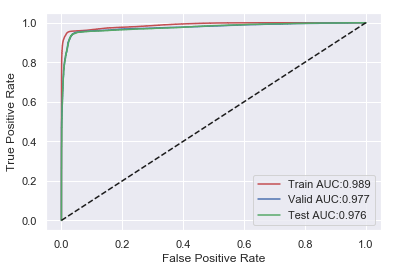

In [413]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Wow the test set mached with the training and validation set and there is neither underfitting nor overfitting the model is perfect.

# Conclusion


We have developed this project and created the machine learning model to predict the flights which will be delayed for more than 15 minutes on arriving at the destination station. We tried various models and evaluated the performances. After using the automatic optimization of parameters. I compared random forest and Stochastic gradient descent and found random forest was able to be the best out of the two. This model was able to catch close to 95 percent of delays.
